In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [76]:
print(f"pandas version = {pd.__version__}")
print(pd.Timestamp.now())

pandas version = 1.5.2
2024-02-13 17:32:59.661681


In [82]:
alcohol_tax = pd.read_csv("https://catalog.excise.go.th/base/catalog/excise/file/03_0401.csv",encoding="TIS-620", date_parser=True)
alcohol_tax.columns.str.strip()
alcohol_tax.rename(columns={"BUDGET_YEAR":"YEAR", "TAX_NETTAX_AMT":"NET_TAX"}, inplace=True)
alcohol_tax

,YEAR,BUDGET_MONTH_DESC,GROUP_NAME,DUTY_NAME,PRODUCT_NAME,NET_TAX,UPDATE_DATE
0,2563,ตุลาคม,ภาษีสุรา,สุรา,สุรา,1.787365e+04,2567-02-01
1,2563,ตุลาคม,ภาษีสุรา,สุรากลั่น,ชนิดอื่นๆ นอกจาก (1) สุราสามทับ,3.129089e+09,2567-02-01
2,2563,ตุลาคม,ภาษีสุรา,สุรากลั่น,สุรากลั่นชนิดสุราขาว,2.602494e+09,2567-02-01
3,2563,ตุลาคม,ภาษีสุรา,สุรากลั่น,สุราสามทับกรณีอื่นๆ นอกจากไปใช้ในการอุตสาหกรรม...,3.140866e+05,2567-02-01
4,2563,ตุลาคม,ภาษีสุรา,สุรากลั่น,สุราสามทับที่นำไปทำการแปลงสภาพ ทั้งนี้ ตามหลัก...,2.494863e+05,2567-02-01
...,...,...,...,...,...,...,...
580,2567,กุมภาพันธ์,ภาษีสุรา,สุรากลั่น,สุรากลั่นชนิดสุราขาว,3.065649e+08,2567-02-01
581,2567,กุมภาพันธ์,ภาษีสุรา,สุราแช่,สุราแช่ชนิดอื่นๆ,4.868985e+06,2567-02-01
582,2567,กุมภาพันธ์,ภาษีสุรา,สุราแช่,"สุราแช่ผลไม้ที่มีราคาขายปลีกแนะนำไม่เกิน 1,000...",4.090500e+05,2567-02-01
583,2567,กุมภาพันธ์,ภาษีสุรา,สุราแช่,ไวน์และสปาร์กลิ้งไวน์ที่ทำจากองุ่นที่มีราคาขาย...,8.203034e+05,2567-02-01


In [95]:
annual_tax = alcohol_tax[alcohol_tax["YEAR"] != 2567].groupby("YEAR").sum(numeric_only=True)
annual_tax = annual_tax.reset_index().copy()
annual_tax

,YEAR,NET_TAX
0,2563,6.188731e+10
1,2564,5.962453e+10
2,2565,5.928510e+10
3,2566,6.428862e+10


In [97]:
print(6*(10**10))

60000000000


In [110]:
colors = [ "deepskyblue" if net_tax > 6*(10**10) else "lightgrey" for net_tax in annual_tax["NET_TAX"].value_counts().index]
colors


['deepskyblue', 'lightgrey', 'lightgrey', 'deepskyblue']

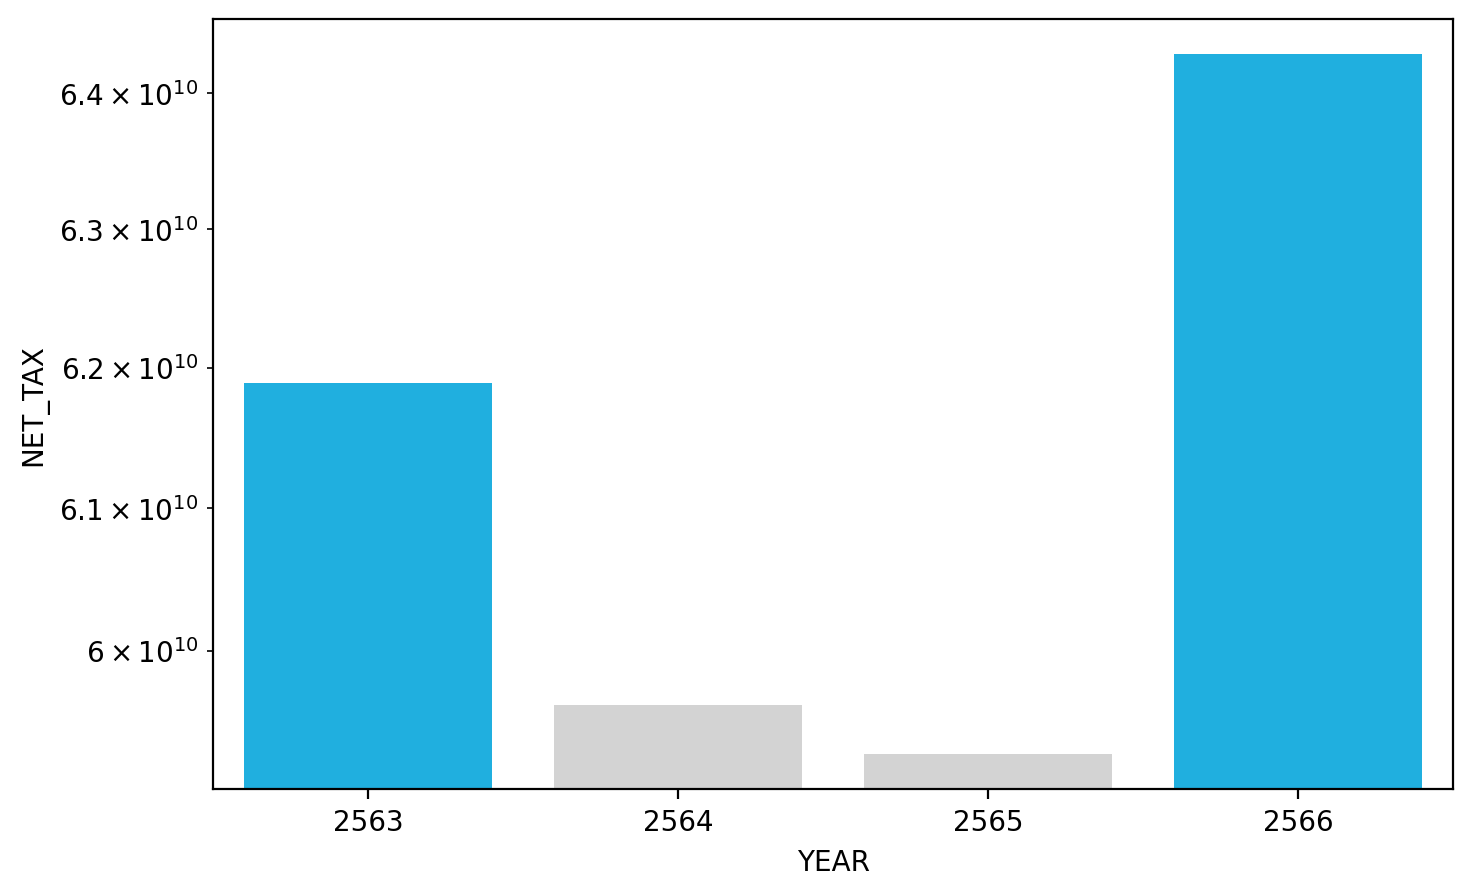

In [111]:
plt.figure(figsize=(8, 5))
sns.barplot(data=annual_tax, x="YEAR", y="NET_TAX", palette=colors)
plt.yscale('log')
plt.title("")


In [21]:
gdp = pd.read_excel("https://api.worldbank.org/v2/th/country/THA?downloadformat=excel", skiprows=3)
gdp.loc[[30,34]]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
30,ประเทศไทย,THA,จีเอ็นไอ (รายได้มวลรวมประชาชาติ) วิธี Atlas (เ...,NY.GNP.ATLS.CD,NaN,NaN,3.282279e+09,3.595887e+09,3.882772e+09,4.324261e+09,...,3.899966e+11,3.942963e+11,3.920549e+11,3.932711e+11,4.129652e+11,4.587927e+11,5.047086e+11,4.942879e+11,5.073807e+11,5.184390e+11
34,ประเทศไทย,THA,จีดีพี (เป็น US$ ปัจจุบัน),NY.GDP.MKTP.CD,2.760751e+09,3.034038e+09,3.308913e+09,3.540403e+09,3.889130e+09,4.388938e+09,...,4.203337e+11,4.073390e+11,4.012962e+11,4.133663e+11,4.563568e+11,5.067542e+11,5.439767e+11,5.004573e+11,5.055681e+11,4.954233e+11
